<a href="https://colab.research.google.com/github/ibe-abu-chi/Python_works/blob/main/MOTORISEDCAMPAIGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
#importing all libraries and data needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_excel('/content/drive/MyDrive/CovidCleanData.xlsx')
MyC = ('blue', "red", 'green', 'hotpink','gray', 'yellow', 'cyan',  'orange', 'indigo', 'black', 'magenta', 'skyblue', 'beige')

In [184]:
df.describe()

,Vaccine Date,Age
count,220286,220286.000000
mean,2023-10-24 11:55:12.112435456,36.929912
min,2023-07-01 00:00:00,16.000000
25%,2023-09-21 00:00:00,25.000000
50%,2023-11-01 00:00:00,35.000000
75%,2023-11-30 00:00:00,46.000000
max,2023-12-31 00:00:00,123.000000
std,NaN,14.822673


In [185]:
#number and percantage of persons in all ages of the data set
a = df.groupby([ 'Age'])['Age'].size().reset_index(name='CountAge')
a['Percent(%)'] = 100 * a['Age']  / a['Age'].sum()
print(a)

      Age  CountAge  Percent(%)
0    16.0       764    0.278565
1    17.0      1890    0.295975
2    18.0     15304    0.313385
3    19.0      6461    0.330795
4    20.0      6739    0.348206
..    ...       ...         ...
88  107.0         1    1.862901
89  109.0         1    1.897721
90  112.0         1    1.949952
91  120.0         1    2.089235
92  123.0         6    2.141466

[93 rows x 3 columns]


In [186]:
df.columns

Index(['Vaccine Date', 'LGA', 'Sex', 'Education', 'Dose', 'Occupation2',
       'Campaign', 'Locality', 'Age'],
      dtype='object')

In [187]:
#Creating AgeGroup
# Define conditions based on age ranges
conditions = [
    (df['Age'] <= 18),
    (df['Age'] > 18) & (df['Age'] < 29),
    (df['Age'] > 28) & (df['Age'] < 39),
    (df['Age'] > 38) & (df['Age'] < 49),
    (df['Age'] > 48) & (df['Age'] < 59),
    (df['Age'] > 58)
]

# Define the corresponding age groups
age_groups = [
    "16-18",
    "19-28",
    "29-38",
    "39-48",
    "49-58",
    ">58"
]

# Use np.select to create the AgeGroup column
df["AgeGroup"] = np.select(conditions, age_groups, default='Unknown')

In [188]:

df['Locality'] = df['Locality'].str.replace('urban', 'Urban')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220286 entries, 0 to 220285
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Vaccine Date  220286 non-null  datetime64[ns]
 1   LGA           220286 non-null  object        
 2   Sex           220286 non-null  object        
 3   Education     220286 non-null  object        
 4   Dose          220286 non-null  object        
 5   Occupation2   220286 non-null  object        
 6   Campaign      220286 non-null  object        
 7   Locality      220286 non-null  object        
 8   Age           220286 non-null  float64       
 9   AgeGroup      220286 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 16.8+ MB


In [190]:
# Get summary statistics of object columns
summary = df.describe(include=['object'])
summary

,LGA,Sex,Education,Dose,Occupation2,Campaign,Locality,AgeGroup
count,220286,220286,220286,220286,220286,220286,220286,220286
unique,15,2,4,3,6,2,2,6
top,Igbo-Eze North,FEMALE,Secondary,First dose,Business,After,Rural,19-28
freq,28388,142046,126061,219138,77832,151909,161506,58508


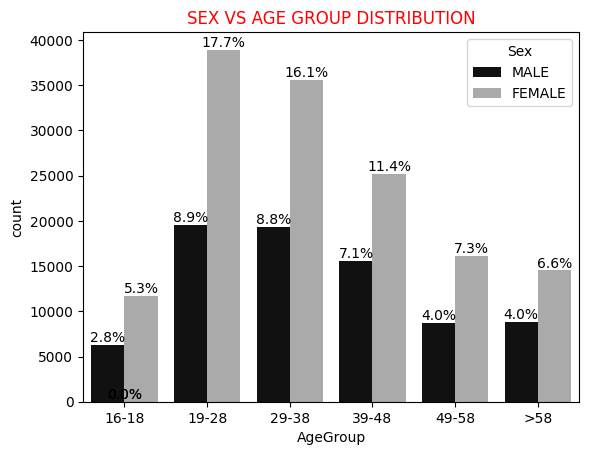

In [191]:
# Define the order for AgeGroup
age_group_order = ['16-18', '19-28', '29-38', '39-48', '49-58', '>58']

# Create the count plot with specified order for AgeGroup
ac = sns.countplot(data=df, x='AgeGroup', hue='Sex', palette=["#111111", "#aaaaaa"], order=age_group_order)

plt.title('SEX VS AGE GROUP DISTRIBUTION', color='r', fontsize='large')

# Annotate each bar with its percentage
for p in ac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / 220286)  # Adjust sample size as needed
    x = p.get_x() + p.get_width() / 2  # Center the annotation
    y = p.get_height()
    ac.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

In [192]:
# Grouping by Campaign and Sex, and counting occurrences
d = df.groupby(['Campaign', 'Sex'])['Sex'].count().reset_index(name='Count')

# Calculating percentage
d['Percent(%)'] = (d['Count'] / len(df)) * 100

# Displaying the result
print(d)

  Campaign     Sex  Count  Percent(%)
0    After  FEMALE  99226   45.044170
1    After    MALE  52683   23.915728
2   Before  FEMALE  42820   19.438366
3   Before    MALE  25557   11.601736


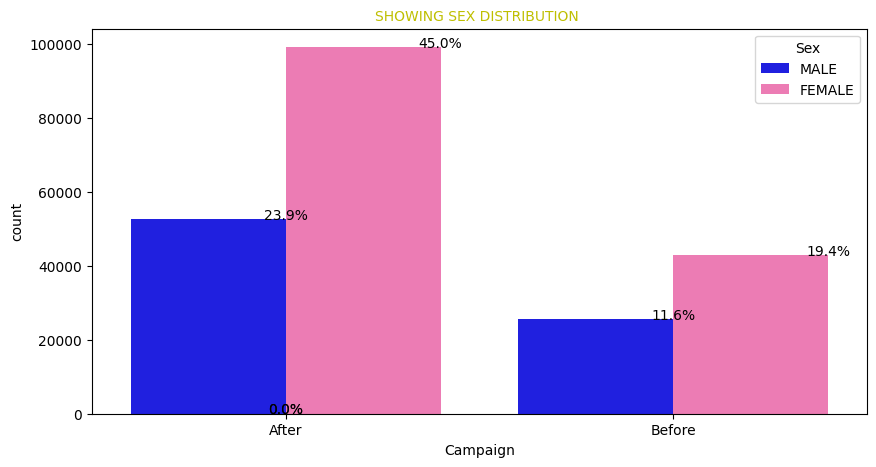

In [193]:
  #a bar chart showing number of enrollments based on sex enrolled in each quater
plt.figure(figsize = (10,5))
aa = sns.countplot(x = 'Campaign' ,  hue = 'Sex', data = df, palette= MyC[0::3] )
plt.title('SHOWING SEX DISTRIBUTION ', color='y', fontsize=10)
for p in aa.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/220286)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    aa.annotate(percentage, (x, y),ha='center')

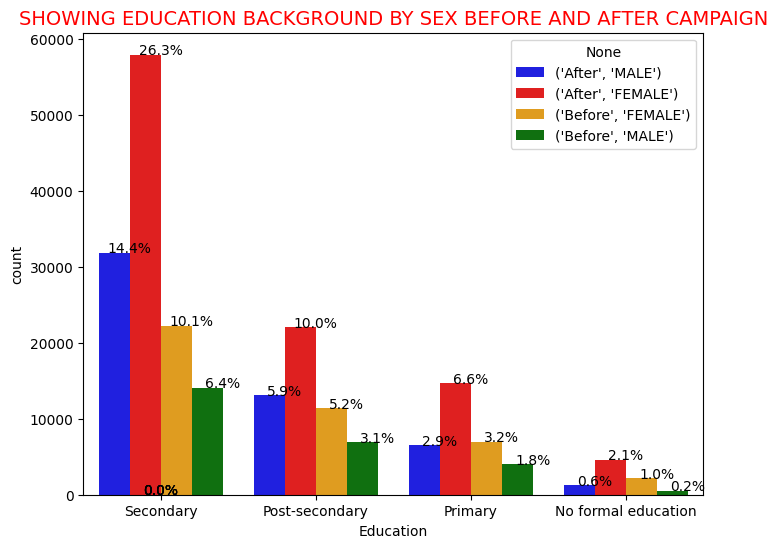

In [194]:
plt.figure(figsize = (8, 6))
a2 = sns.countplot(x ='Education', data=df,
            hue=df[['Campaign', 'Sex']].apply(tuple, axis=1), palette=['blue',  'red', 'orange', 'green'])
plt.title('SHOWING EDUCATION BACKGROUND BY SEX BEFORE AND AFTER CAMPAIGN',
          color='r', fontsize=14)
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/220286)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y),ha='center')

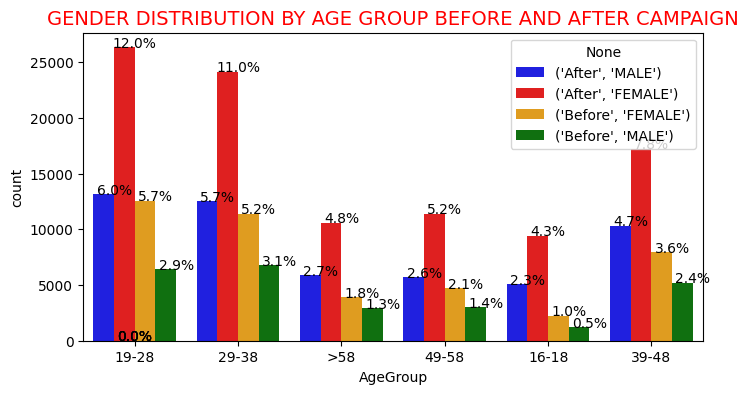

In [195]:
plt.figure(figsize = (8, 4))
a2 = sns.countplot(x ='AgeGroup', data=df,
            hue=df[['Campaign', 'Sex']].apply(tuple, axis=1), palette=['blue',  'red', 'orange', 'green'])
plt.title('GENDER DISTRIBUTION BY AGE GROUP BEFORE AND AFTER CAMPAIGN',
          color='r', fontsize=14)
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/220286)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y),ha='center')

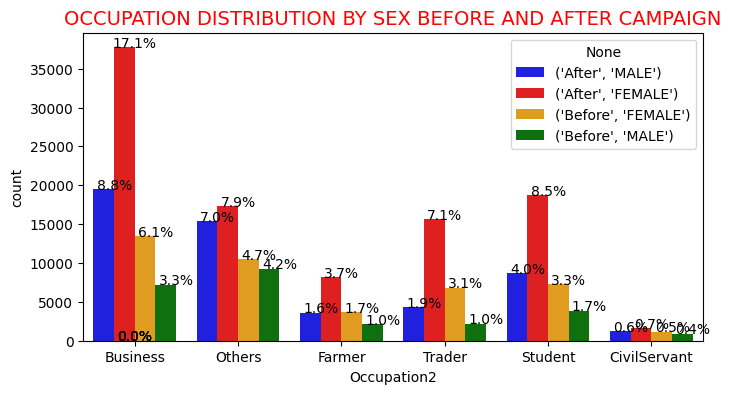

In [196]:
plt.figure(figsize = (8, 4))
a2 = sns.countplot(x ='Occupation2', data=df,
            hue=df[['Campaign', 'Sex']].apply(tuple, axis=1), palette=['blue',  'red', 'orange', 'green'])
plt.title('OCCUPATION DISTRIBUTION BY SEX BEFORE AND AFTER CAMPAIGN',
          color='r', fontsize=14)
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/220286)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y),ha='center')

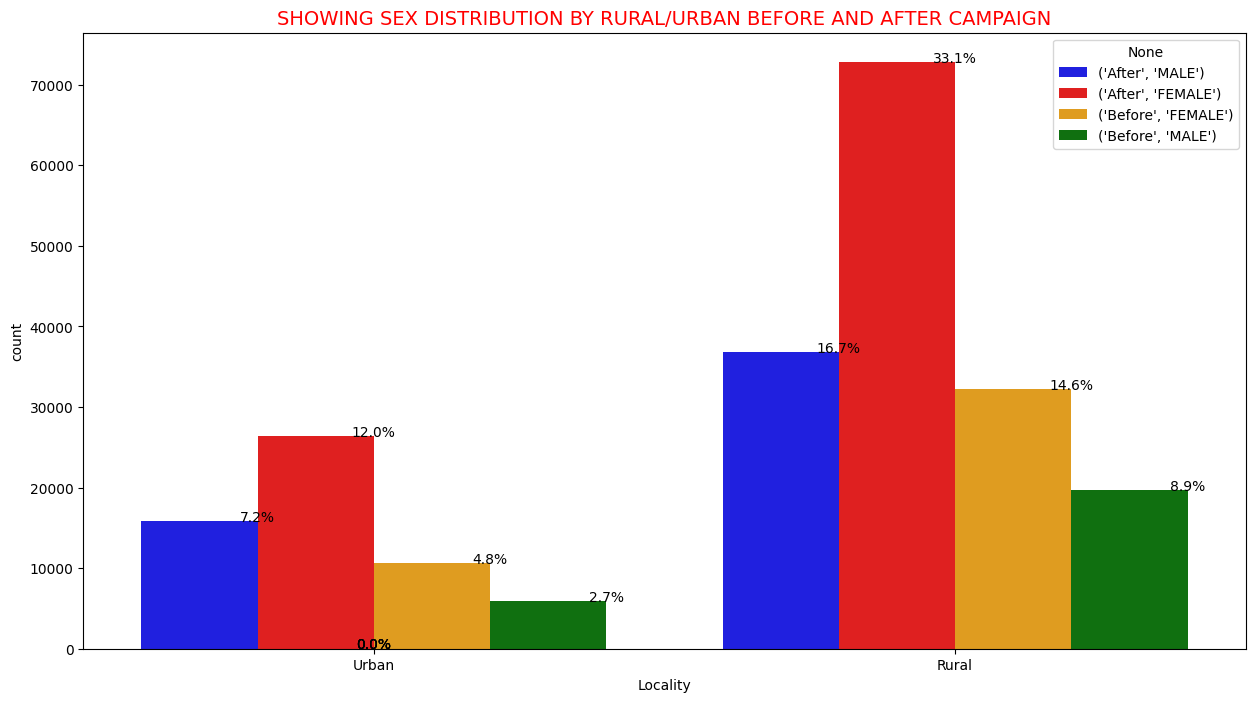

In [197]:
plt.figure(figsize = (15, 8))
a2 = sns.countplot(x ='Locality', data=df,
            hue=df[['Campaign', 'Sex']].apply(tuple, axis=1), palette=['blue',  'red', 'orange', 'green'])
plt.title('SHOWING SEX DISTRIBUTION BY RURAL/URBAN BEFORE AND AFTER CAMPAIGN',
          color='r', fontsize=14)
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/220286)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y),ha='center')

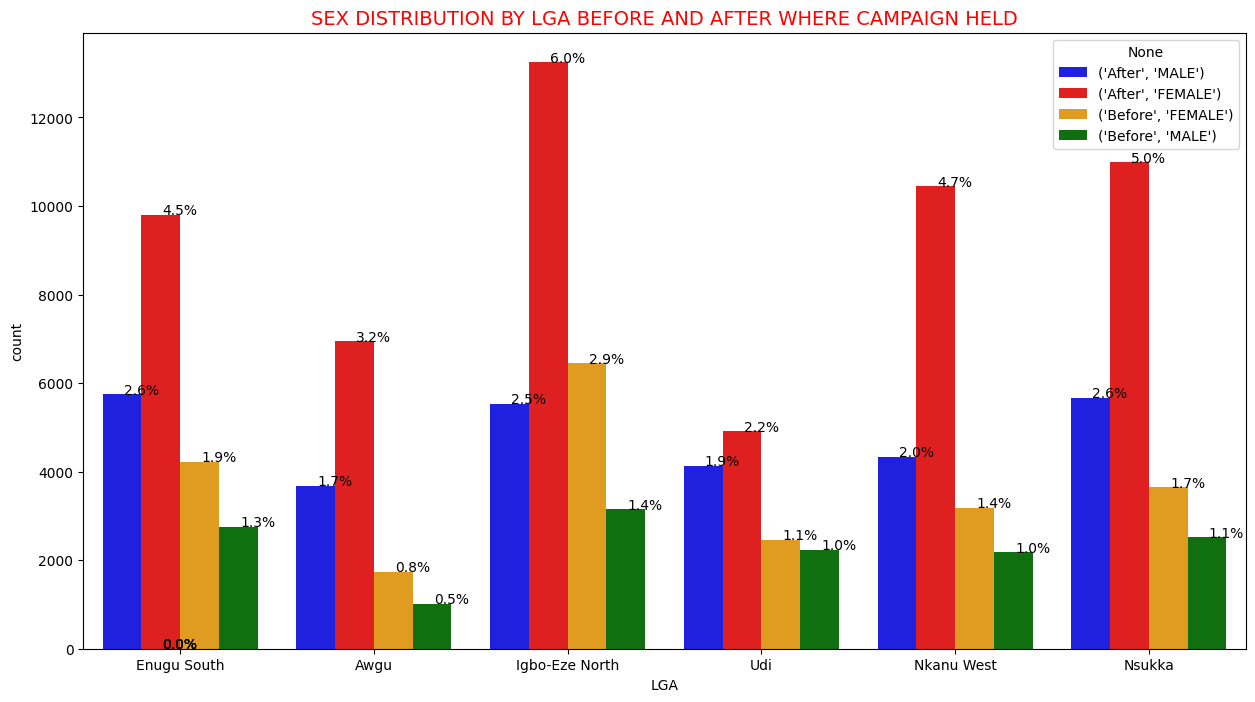

In [198]:
# Replace with your actual list desired LGA names
target_lgas = ['Awgu', 'Igbo-Eze North', 'Nkanu West', 'Nsukka',
               'Udi', 'Enugu South']

# Filter the DataFrame
df_filtered = df[df['LGA'].isin(target_lgas)]

# Create the countplot
plt.figure(figsize=(15, 8))
a2 = sns.countplot(x='LGA', data=df_filtered,
                  hue=df_filtered[['Campaign', 'Sex']].apply(tuple, axis=1), palette=['blue',  'red', 'orange', 'green'])
plt.title('SEX DISTRIBUTION BY LGA BEFORE AND AFTER WHERE CAMPAIGN HELD',
          color='r', fontsize=14)

# Annotations (adjust the total as needed)
total = 220286  # Replace with the correct total
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y), ha='center')

plt.show()

In [199]:
df['LGA'].unique()

array(['Enugu South', 'Enugu East', 'Enugu North', 'Awgu', 'Aninri',
       'Igbo-Eze North', 'Igbo-Eze South', 'Igbo-Etiti', 'Udi', 'Udenu',
       'Nkanu West', 'Nsukka', 'Uzo-Uwani', 'Oji-River', 'Nkanu East'],
      dtype=object)

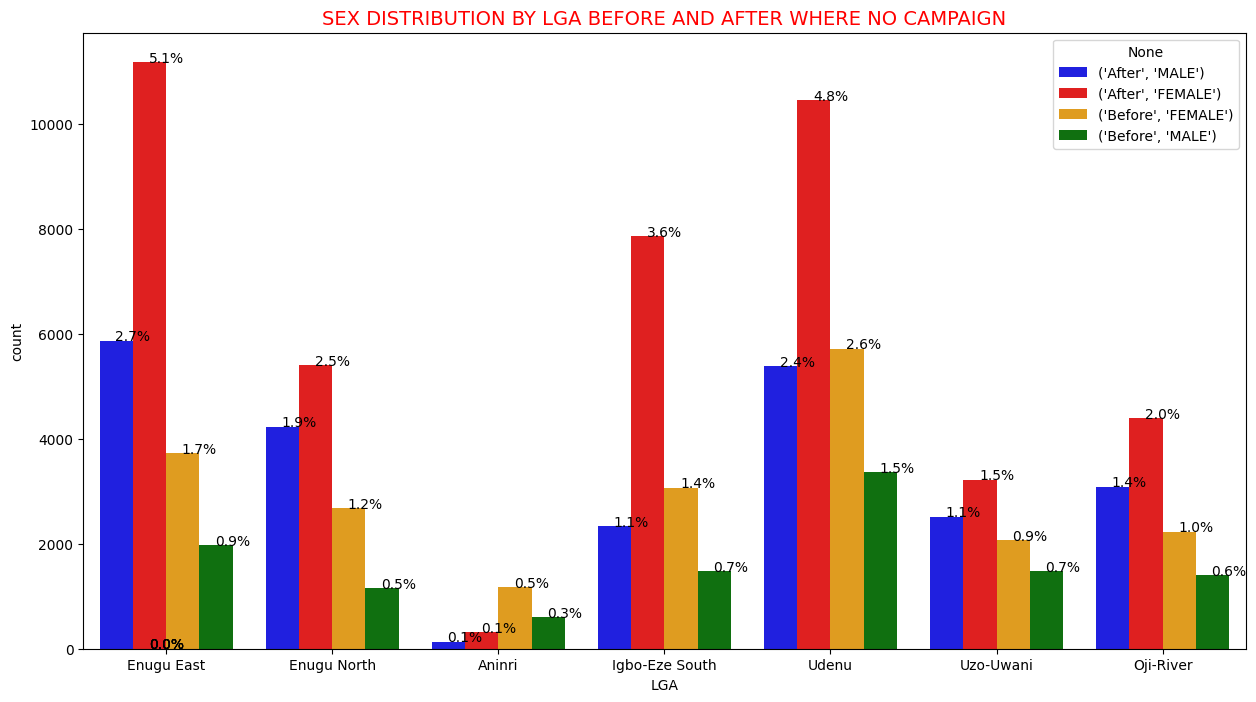

In [200]:
# Replace with your actual list of 8 desired LGA names
target_lgas = ['Enugu East', 'Igbo-Eze South', 'Aninri',
               'Enugu North', 'Udenu', 'Oji-River','Uzo-Uwani']

# Filter the DataFrame
df_filtered = df[df['LGA'].isin(target_lgas)]

# Create the countplot
plt.figure(figsize=(15, 8))
a2 = sns.countplot(x='LGA', data=df_filtered,
                  hue=df_filtered[['Campaign', 'Sex']].apply(tuple, axis=1), palette=['blue',  'red', 'orange', 'green'])
plt.title("SEX DISTRIBUTION BY LGA BEFORE AND AFTER WHERE NO CAMPAIGN",
          color='r', fontsize=14)

# Annotations (adjust the total as needed)
total = 220286  # Replace with the correct total
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y), ha='center')

plt.show()

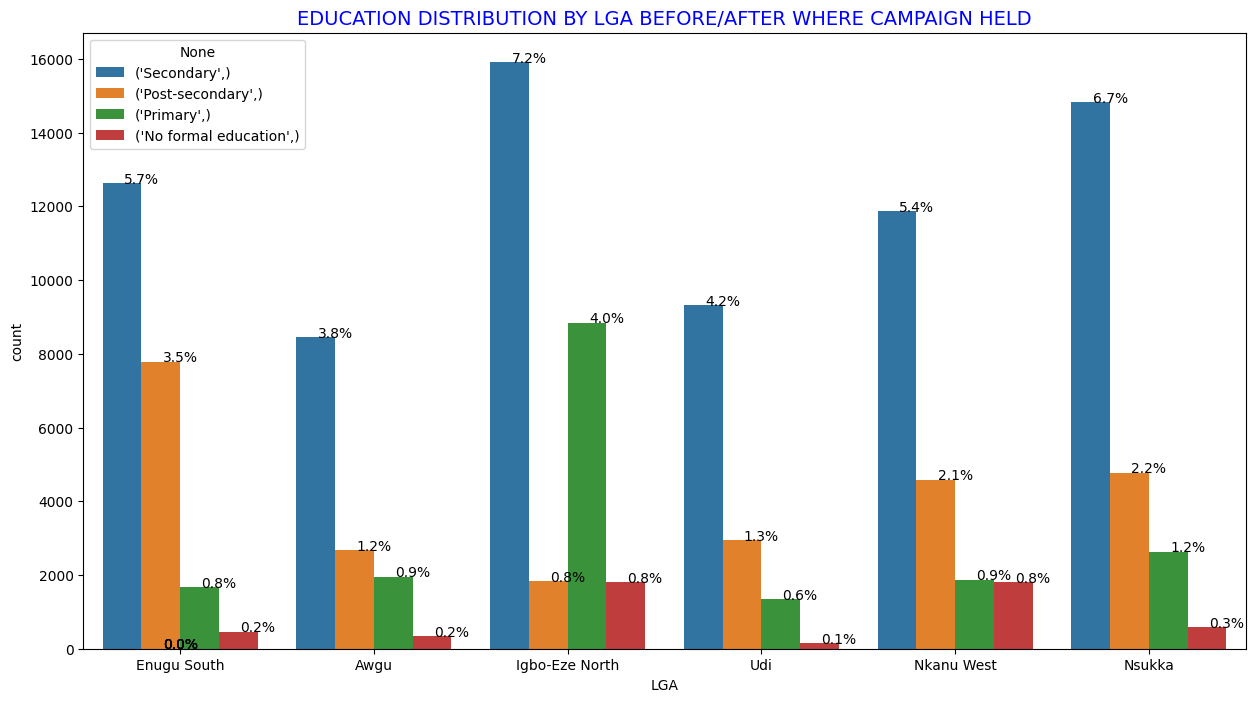

In [201]:
# Replace with your actual list of 8 desired LGA names
target_lgas = ['Awgu', 'Igbo-Eze North', 'Nkanu West', 'Nsukka',
               'Udi', 'Enugu South']

# Filter the DataFrame
df_filtered = df[df['LGA'].isin(target_lgas)]

# Create the countplot
plt.figure(figsize=(15, 8))
a2 = sns.countplot(x='LGA', data=df_filtered,
                  hue=df_filtered[['Education']].apply(tuple, axis=1))
plt.title('EDUCATION DISTRIBUTION BY LGA BEFORE/AFTER WHERE CAMPAIGN HELD',
          color='b', fontsize=14)

# Annotations (adjust the total as needed)
total = 220286  # Replace with the correct total
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y), ha='center')

plt.show()

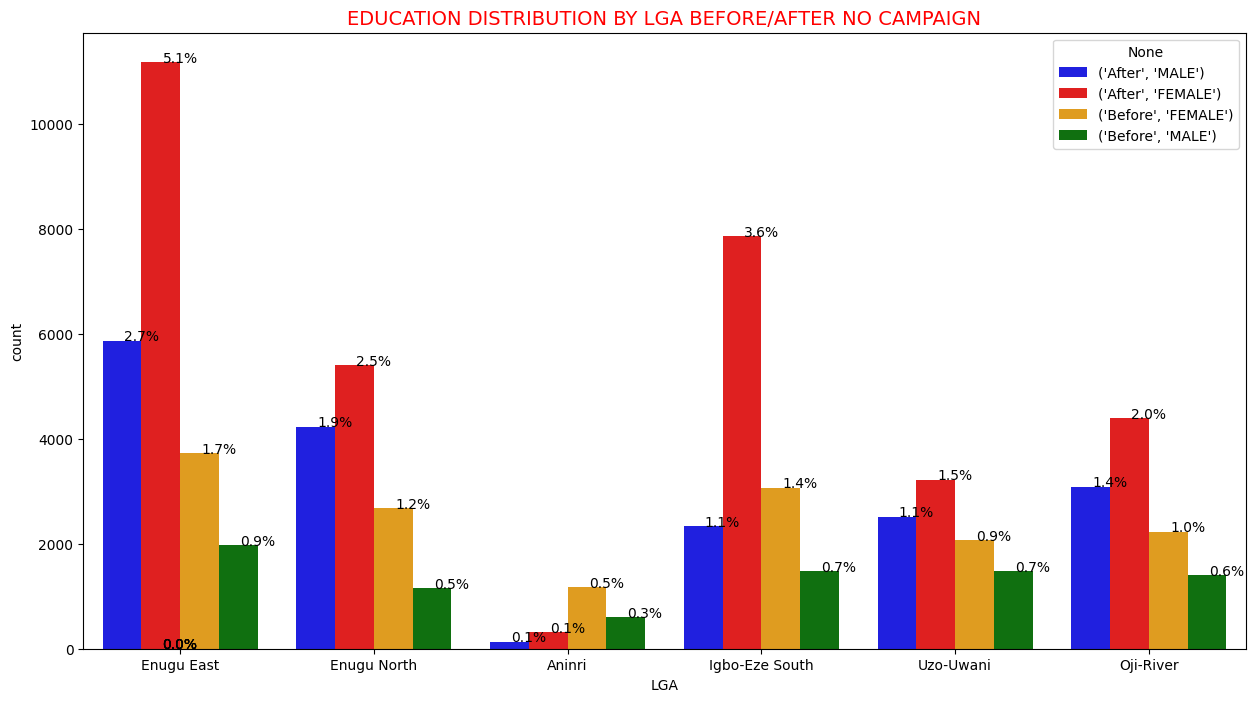

In [202]:
# Replace with actual list of LGA names where there is no campaign
target_lgas = ['Enugu East', 'Igbo-Eze South', 'Aninri',
               'Enugu North', 'Oji-River','Uzo-Uwani']

# Filter the DataFrame
df_filtered = df[df['LGA'].isin(target_lgas)]

# Create the countplot
plt.figure(figsize=(15, 8))
a2 = sns.countplot(x='LGA', data=df_filtered,
                  hue=df_filtered[['Campaign', 'Sex']].apply(tuple, axis=1),
                   palette=['blue',  'red', 'orange', 'green'])
plt.title('EDUCATION DISTRIBUTION BY LGA BEFORE/AFTER NO CAMPAIGN',
          color='r', fontsize=14)

# Annotations (adjust the total as needed)
total = 220286  # Replace with the correct total
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y), ha='center')

plt.show()

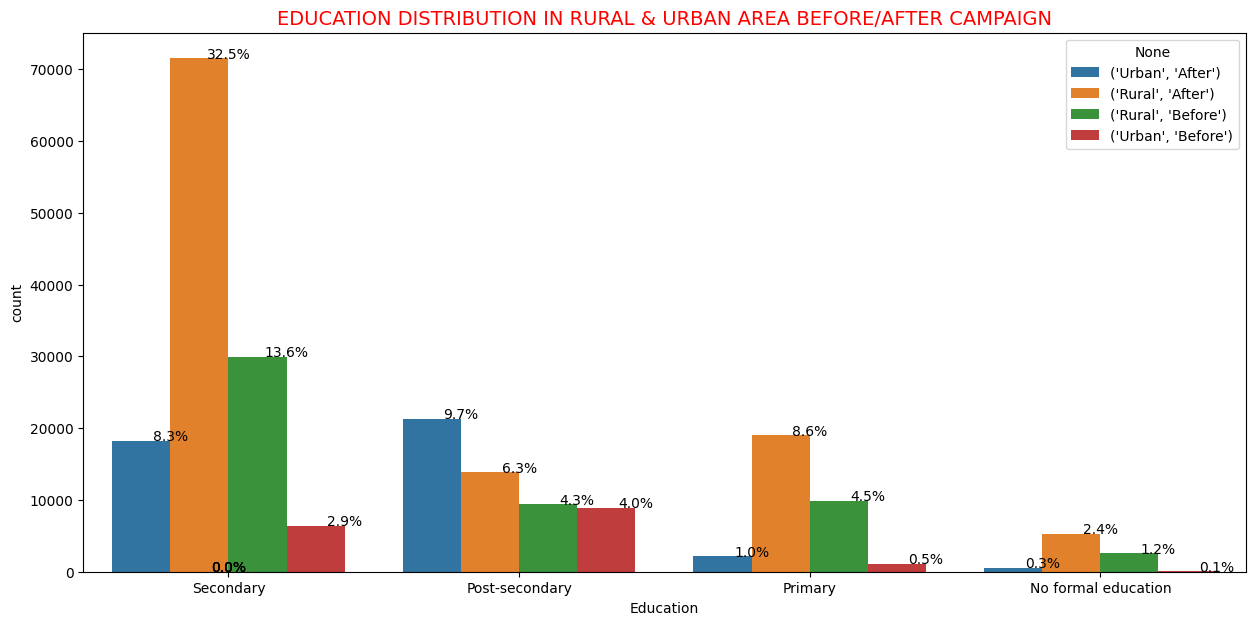

In [203]:
plt.figure(figsize = (15, 7))
a2 = sns.countplot(x ='Education', data=df,
            hue=df[['Locality', 'Campaign']].apply(tuple, axis=1))
plt.title('EDUCATION DISTRIBUTION IN RURAL & URBAN AREA BEFORE/AFTER CAMPAIGN',
          color='r',
          fontsize=14)
for p in a2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/220286)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a2.annotate(percentage, (x, y),ha='center')

In [204]:
df.drop(['Vaccine Date', 'AgeGroup', 'Locality', 'Dose',  'Occupation2', 'Education'], axis=1, inplace=True)


In [205]:
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import statsmodels.api as sm

In [206]:
#binary encode

def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df


In [207]:
#Where no campaign
entries_to_drop = ['Awgu', 'Igbo-Eze North', 'Nkanu West', 'Nsukka',
                   'Udi', 'Enugu South']

# Filter the DataFrame
dfn = df[~df['LGA'].isin(entries_to_drop)]

dfn = dfn.drop('LGA', axis=1)


In [208]:
#Where campaign held
entries_to_drop = ['Enugu East', 'Enugu North', 'Aninri',
                   'Igbo-Eze South', 'Igbo-Etiti', 'Udenu', 'Uzo-Uwani', 'Oji-River', 'Nkanu East']

# Filter the DataFrame
dfc = df[~df['LGA'].isin(entries_to_drop)]

dfc = dfc.drop('LGA', axis=1)

In [209]:
dfc.columns

Index(['Sex', 'Campaign', 'Age'], dtype='object')

**FOCUSING ON WHERE THERE WAS NO CAMPAIGN** **BEFORE AND AFTER**

In [210]:
dfn = binary_encode(dfn, 'Sex', 'Female')
dfn = binary_encode(dfn, 'Campaign', 'After')


In [211]:
#Splitting

y = dfn['Campaign'].copy()
x = dfn.drop('Campaign', axis=1).copy()

In [212]:
#Feature enginerring
scaler = StandardScaler()

X = scaler.fit_transform(x)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=100)

In [214]:
y_train.mean()

0.6700710255893613

In [215]:
print("Class Distribution (Psitive:Negative): {:.2f}% / {:.2f}%".format(y_train.mean() *100, (1-y_train.mean())*100))

Class Distribution (Psitive:Negative): 67.01% / 32.99%


In [216]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6601 - auc: 0.4982 - loss: 0.6562 - val_accuracy: 0.6665 - val_auc: 0.4916 - val_loss: 0.6536
Epoch 2/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6692 - auc: 0.4989 - loss: 0.6420 - val_accuracy: 0.6665 - val_auc: 0.4925 - val_loss: 0.6508
Epoch 3/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6631 - auc: 0.4991 - loss: 0.6468 - val_accuracy: 0.6665 - val_auc: 0.4961 - val_loss: 0.6381
Epoch 4/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6629 - auc: 0.4964 - loss: 0.6446 - val_accuracy: 0.6665 - val_auc: 0.5031 - val_loss: 0.6367
Epoch 5/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6675 - auc: 0.4970 - loss: 0.6409 - val_accuracy: 0.6643 - val_auc: 0.5074 - val_loss: 0.6486
Epoch 6/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6685 - auc: 0.4984 - loss: 0.6395 - val_accuracy: 0.6665 - val_auc: 0.4919 - val_loss: 0.6369
Epoch 7/100
993/993 ━━━━━━━━━━━━━━

In [217]:
#results
model.evaluate(X_test, y_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6655 - auc: 0.5068 - loss: 0.6373


[0.6364645957946777, 0.6668345928192139, 0.5028823614120483]

In [218]:
y_true = np.array(y_test)
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int32)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [219]:
#Report
target_names = ['Before', 'After']
print('CLASSIFICATION REPORT WHERE NO CAMPAIGN: \n\n', classification_report(y_test, y_pred, target_names=target_names))

CLASSIFICATION REPORT WHERE NO CAMPAIGN: 

               precision    recall  f1-score   support

      Before       0.00      0.00      0.00      6614
       After       0.67      1.00      0.80     13238

    accuracy                           0.67     19852
   macro avg       0.33      0.50      0.40     19852
weighted avg       0.44      0.67      0.53     19852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [220]:
print('CONFUSION MATRIX: \n', confusion_matrix(y_true, y_pred))

CONFUSION MATRIX: 
 [[    0  6614]
 [    0 13238]]


In [221]:
#view model summary
print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

None


In [222]:
#add constant to predictor variables
X = sm.add_constant(X)

#fitting the regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Campaign   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.615
Date:                Fri, 18 Oct 2024   Prob (F-statistic):             0.0573
Time:                        11:00:53   Log-Likelihood:                -65987.
No. Observations:               99260   AIC:                         1.320e+05
Df Residuals:                   99258   BIC:                         1.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6694      0.001    448.338      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


**LET'S SEE WHERE THE CAMPAIGN HELD**

In [223]:
dfc = binary_encode(dfc, 'Sex', 'Female')
dfc = binary_encode(dfc, 'Campaign', 'After')


In [224]:
#Splitting

y = dfc['Campaign'].copy()
x = dfc.drop('Campaign', axis=1).copy()

In [225]:
#Feature enginerring
scaler = StandardScaler()

X = scaler.fit_transform(x)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=100)

In [227]:
y_train.mean()

0.7060937822763892

In [228]:
print("Class Distribution (Psitive:Negative): {:.2f}% / {:.2f}%".format(y_train.mean() *100, (1-y_train.mean())*100))

Class Distribution (Psitive:Negative): 70.61% / 29.39%


In [229]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7051 - auc: 0.4986 - loss: 0.6209 - val_accuracy: 0.7032 - val_auc: 0.4781 - val_loss: 0.6652
Epoch 2/100
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7037 - auc: 0.5046 - loss: 0.6140 - val_accuracy: 0.7032 - val_auc: 0.4785 - val_loss: 0.6090
Epoch 3/100
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7029 - auc: 0.5023 - loss: 0.6122 - val_accuracy: 0.7032 - val_auc: 0.5424 - val_loss: 0.6079
Epoch 4/100
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7080 - auc: 0.5107 - loss: 0.6059 - val_accuracy: 0.7032 - val_auc: 0.5396 - val_loss: 0.6069
Epoch 5/100
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7046 - auc: 0.5202 - loss: 0.6074 - val_accuracy: 0.7032 - val_auc: 0.5400 - val_loss: 0.6075
Epoch 6/100
1211/1211 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7069 - auc: 0.5262 - loss: 0.6048 - val_accuracy: 0.7032 - val_auc: 0.5392 - val_loss: 0.6085
Epoch 7/100
1211/1211 

In [230]:
#results
model.evaluate(X_test, y_test)

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7090 - auc: 0.5430 - loss: 0.6008


[0.6031155586242676, 0.7063537836074829, 0.5421401262283325]

In [231]:
y_true = np.array(y_test)
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int32)

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [238]:
#Report
target_names = ['Before', 'After']
print('CLASSIFICATION REPORT WHERE MOTORISED CAMPAIGN HELD : \n\n', classification_report(y_test, y_pred, target_names=target_names))

CLASSIFICATION REPORT WHERE MOTORISED CAMPAIGN HELD : 

               precision    recall  f1-score   support

      Before       0.00      0.00      0.00      7108
       After       0.71      1.00      0.83     17098

    accuracy                           0.71     24206
   macro avg       0.35      0.50      0.41     24206
weighted avg       0.50      0.71      0.58     24206



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [233]:
print('CONFUSION MATRIX: \n', confusion_matrix(y_true, y_pred))

CONFUSION MATRIX: 
 [[    0  7108]
 [    0 17098]]


In [234]:
#view model summary
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,253 (51.77 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,836 (34.52 KB)

None


In [235]:

#define response variable
y = dfc['Campaign'].copy()

#define predictor variables
x = dfc.drop('Campaign', axis=1).copy()

#add constant to predictor variables
X = sm.add_constant(X)

#fitting the regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Campaign   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     23.92
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.01e-06
Time:                        11:01:39   Log-Likelihood:                -76553.
No. Observations:              121026   AIC:                         1.531e+05
Df Residuals:                  121024   BIC:                         1.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7061      0.001    539.337      0.0